In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [87]:
k = 1
m = 1
t0 = 0
dt = 0.005
tk = 100
time = np.arange(t0,tk,dt)
x0 = 10
p0 = 0
E = []

In [88]:
x_im = np.empty(len(time))
x_im[0] = x0
p_im = np.empty(len(time))
p_im[0] = p0

x_ex = np.empty(len(time))
x_ex[0] = x0
p_ex = np.empty(len(time))
p_ex[0] = p0

x_s1 = np.empty(len(time))
x_s1[0] = x0
p_s1 = np.empty(len(time))
p_s1[0] = p0

x_s2 = np.empty(len(time))
x_s2[0] = x0
p_s2 = np.empty(len(time))
p_s2[0] = p0

Explicit

In [89]:
def explicit(x,p,T):
    for i in range(1,T):
        p[i] = p[i-1] + (-k)*x[i-1]*dt
        x[i] = x[i-1] + p[i-1]/m*dt

In [90]:
def implicit(x,p,T):
    for i in range(1,T):
        a = np.array([[1,-dt/m],[k*dt, 1]])
        b = np.array([x[i-1], p[i-1]])
        x[i], p[i] = np.linalg.solve(a,b)

In [91]:
def semimplicit_1(x,p,T):
    for i in range(1,T):
        p[i] = p[i-1] + (-k)*x[i-1]*dt
        x[i] = x[i-1] + p[i]/m*dt

In [92]:
def semimplicit_2(x,p,T):
    for i in range(1,T):
        x[i] = x[i-1] + p[i-1]/m*dt
        p[i] = p[i-1] + (-k)*x[i]*dt
        

In [134]:
def analitical(m,k,x0,time):
    xa = np.zeros(len(time))
    pa = np.zeros(len(time))
    Ea = np.zeros(len(time))
    w = math.sqrt(k/m)
    for i in range(len(time)):
        xa[i] = x0*math.sin(w*time[i] + math.pi/2)
        pa[i] = x0*w*math.cos(w*time[i] + math.pi/2)
        Ea[i] = k*xa[i]**2/2 + pa[i]**2/m/2
    return xa,Ea

In [94]:
def energy(x,p,T):
    E = np.empty(T)
    for i in range(0,T):
        E[i] = k*x[i]*x[i]/2 + p[i]*p[i]/m/2
    return E

In [135]:
explicit(x_ex,p_ex,len(time))
implicit(x_im,p_im,len(time))
semimplicit_1(x_s1,p_s1,len(time))
semimplicit_2(x_s2,p_s2,len(time))

E_ex = energy(x_ex,p_ex,len(time))
E_im = energy(x_im,p_im,len(time))
E_s1 = energy(x_s1,p_s1,len(time))
E_s2 = energy(x_s2,p_s2,len(time))
xa,Ea = analitical(m,k,x0,time)

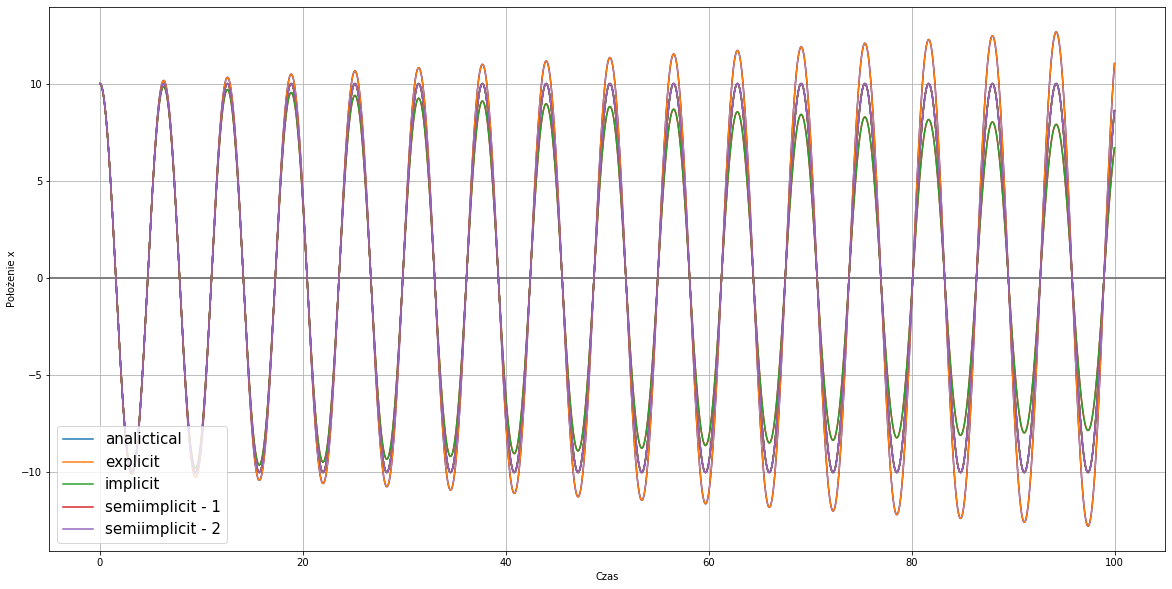

In [123]:
# Zestawienie wszyst
plt.figure(figsize=(20, 10))
plt.ylabel("Położenie x")
plt.xlabel("Czas")
plt.axhline(linewidth=2, color='gray')
plt.plot(time,xa,'black',time,x_ex,'b',time,x_im,'r',time,x_s1,'g',time,x_s2,'y')
plt.plot(time,xa,label = 'analictical')
plt.plot(time,x_ex,label = 'explicit')
plt.plot(time,x_im,label = 'implicit')
plt.plot(time,x_s1,label = 'semiimplicit - 1')
plt.plot(time,x_s2,label = 'semiimplicit - 2')
plt.legend(loc=3, prop={'size': 15})
plt.grid()
plt.savefig("Zad15-ampl.png")
plt.show()

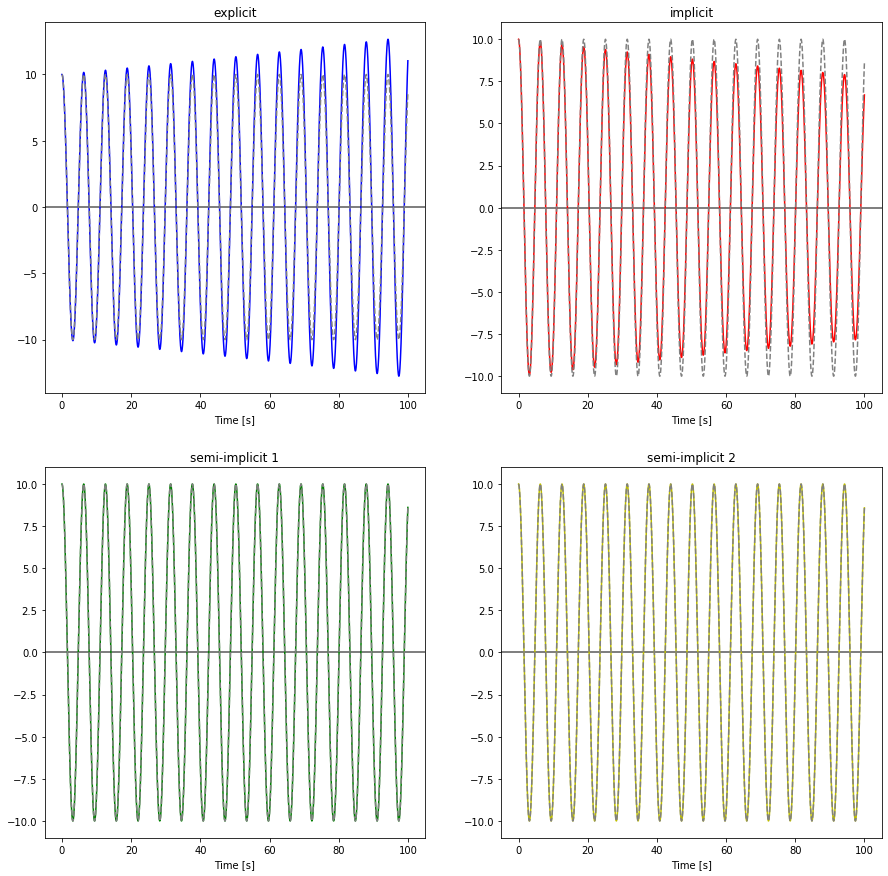

In [122]:
#Narysowanie wykresów
fig, ax = plt.subplots(2,2,figsize=[15,15])
ax[0][0].set_title('explicit')
ax[0][0].axhline(linewidth=2, color='gray')
ax[0][1].set_title('implicit')
ax[0][1].axhline(linewidth=2, color='gray')
ax[1][0].set_title('semi-implicit 1')
ax[1][0].axhline(linewidth=2, color='gray')
ax[1][1].set_title('semi-implicit 2')
ax[1][1].axhline(linewidth=2, color='gray')

ax[0][0].set_xlabel('Time [s]')
ax[0][1].set_xlabel('Time [s]')
ax[1][0].set_xlabel('Time [s]')
ax[1][1].set_xlabel('Time [s]')
ax[0][0].plot(time,x_ex,'b')
ax[0][0].plot(time,xa,color='gray',linestyle='dashed')
ax[0][1].plot(time,x_im,'r')
ax[0][1].plot(time,xa,color='gray',linestyle='dashed')
ax[1][0].plot(time,x_s1,'g')
ax[1][0].plot(time,xa,color='gray',linestyle='dashed')
ax[1][1].plot(time,x_s2,'y')
ax[1][1].plot(time,xa,color='gray',linestyle='dashed')
plt.savefig("zad15-4x4.png")
plt.show()

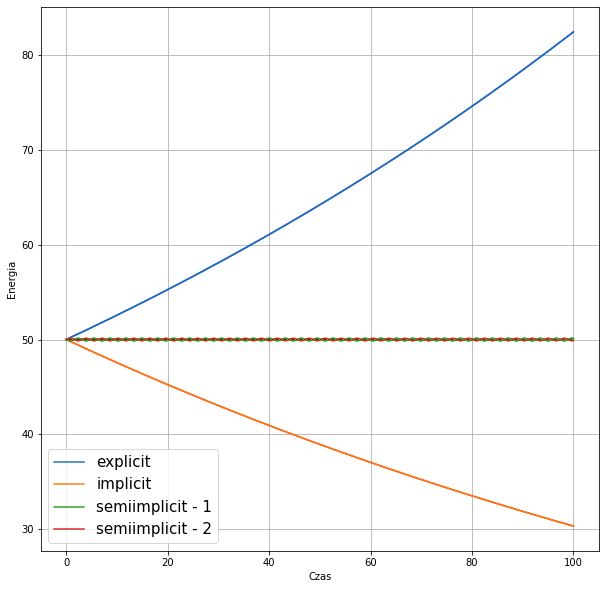

In [136]:
plt.figure(figsize=(10, 10))
plt.ylabel("Energia")
plt.xlabel("Czas")
plt.plot(time,Ea,'k--',time,E_ex,'b',time,E_im,'r',time,E_s1,'g',time,E_s2,'y')
plt.plot(time,E_ex,label = 'explicit')
plt.plot(time,E_im,label = 'implicit')
plt.plot(time,E_s1,label = 'semiimplicit - 1')
plt.plot(time,E_s2,label = 'semiimplicit - 2')
plt.savefig("zad16-energy.png")
plt.legend(loc=3, prop={'size': 15})
plt.grid()
plt.savefig("Zad15-energ.png")
plt.show()